In [115]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [40]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### No null values found

In [42]:
(df['salary'].value_counts()/len(df))*100

 <=50K    75.919044
 >50K     24.080956
Name: salary, dtype: float64

#### Here we can see there is a massive imbalance of data with 76% belonging to lower than 50K earning and 24% earning above 50K

# Visualization

### Education salary distribution

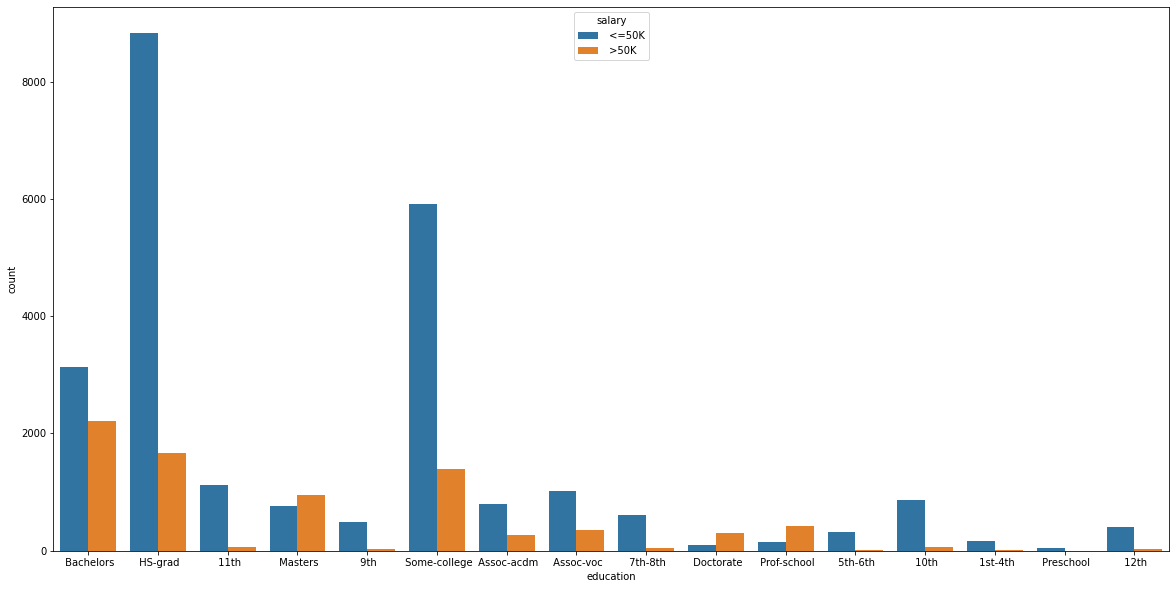

In [43]:
plt.figure(figsize=(20, 10))
sns.countplot(x=df['education'], hue = df['salary'])

### Race Distribution

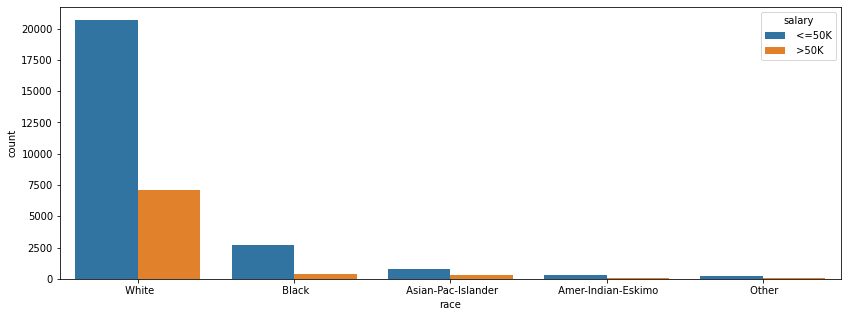

In [44]:
plt.figure(figsize=(14, 5))
sns.countplot(x=df['race'], hue = df['salary'])

### Gender Distribution

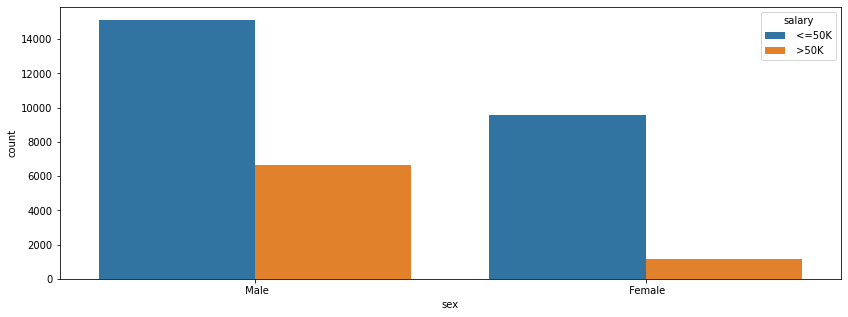

In [45]:
plt.figure(figsize=(14, 5))
sns.countplot(x=df['sex'], hue = df['salary'])

### Marital staus

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


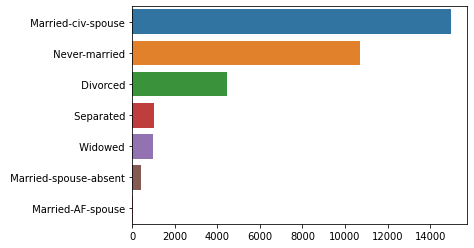

In [46]:
sns.barplot(df["marital-status"].value_counts().values, df["marital-status"].value_counts().index)

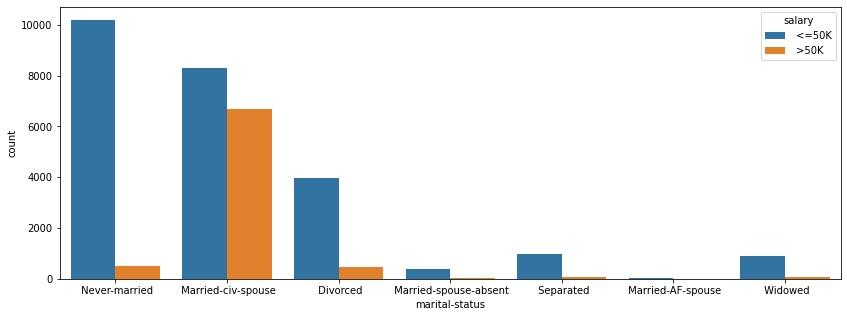

In [47]:
plt.figure(figsize=(14, 5))
sns.countplot(x=df['marital-status'], hue = df['salary'])

### Age distribution

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

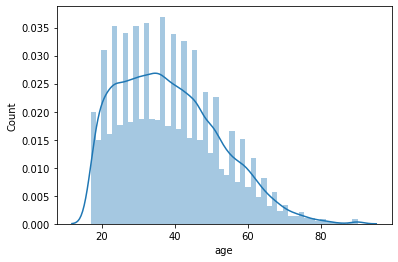

In [48]:
sns.distplot(df['age'])
plt.ylabel('Count')

### Income across age

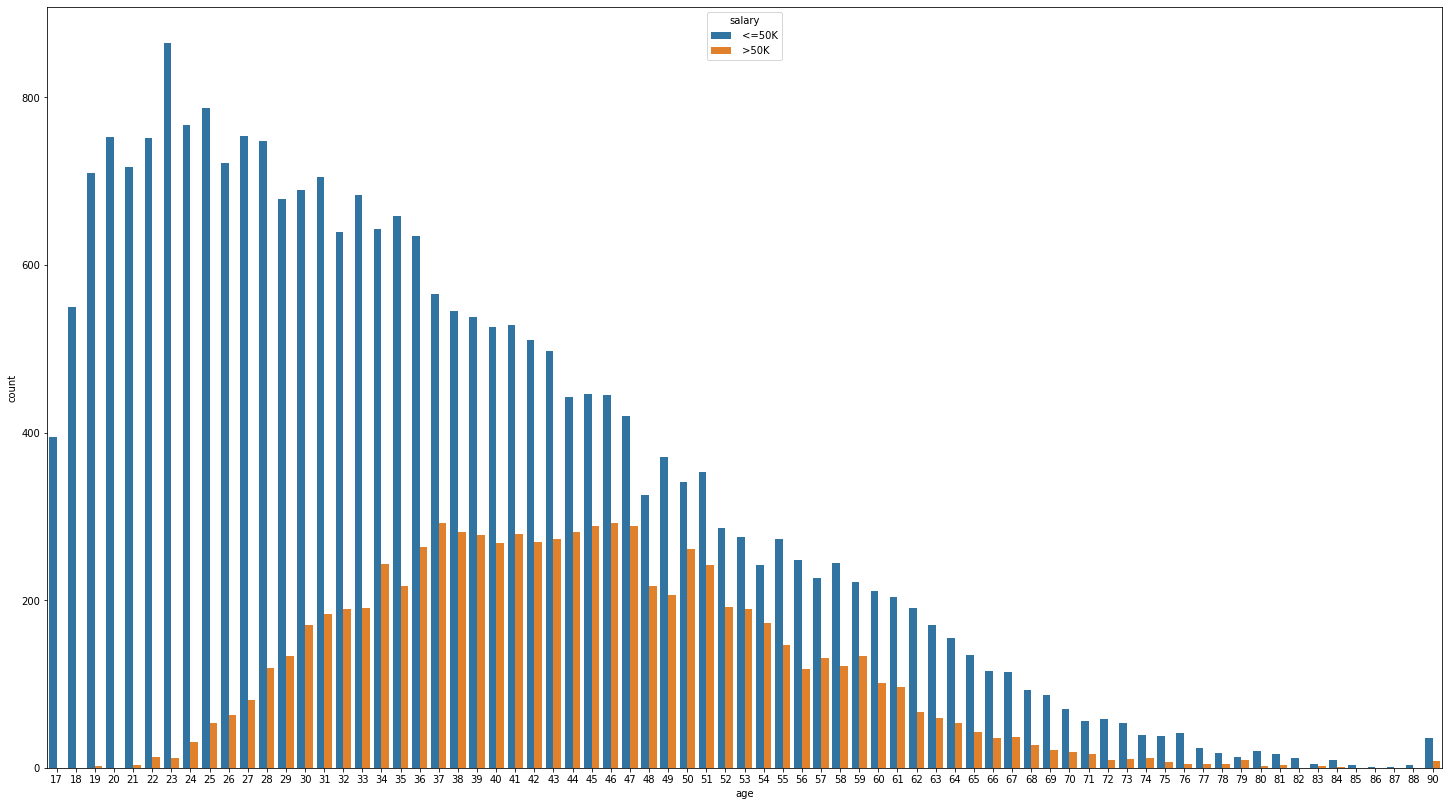

In [49]:
plt.figure(figsize=(25,14))
sns.countplot(x = df['age'], hue=df['salary'])

#### People aged below 17-35 who are starting their career draw a salary of less than 50K and people in ages between 35-45 are more likely to earn above 50K

### Salary across occupation

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


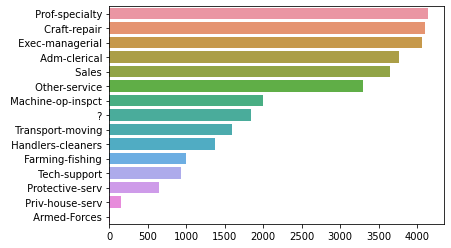

In [50]:
sns.barplot(df['occupation'].value_counts().values, df['occupation'].value_counts().index)

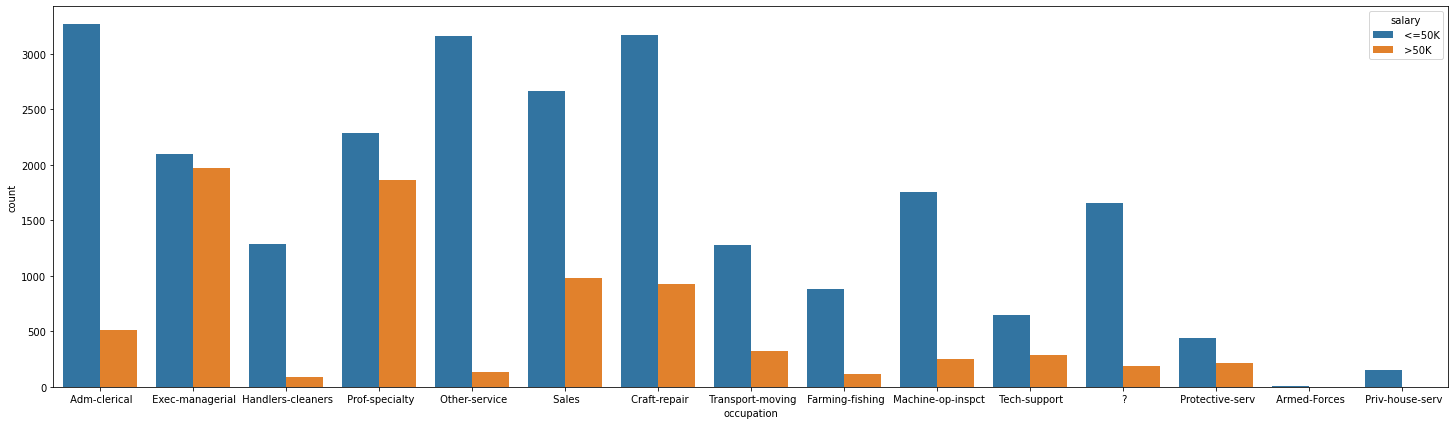

In [51]:
plt.figure(figsize=(25, 7))
sns.countplot(x = df['occupation'], hue = df['salary'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


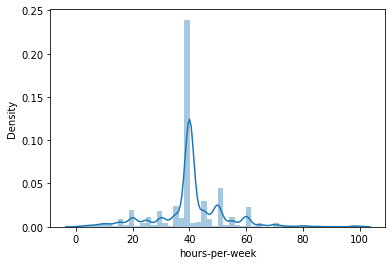

In [52]:
sns.distplot(df['hours-per-week'])

#### 40 hours per week is average

### Relationship

In [53]:
rel_values = df['relationship'].value_counts()
rel_values

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


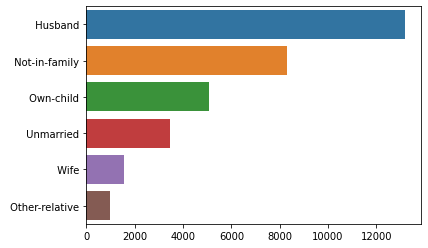

In [54]:
sns.barplot(rel_values.values, rel_values.index)

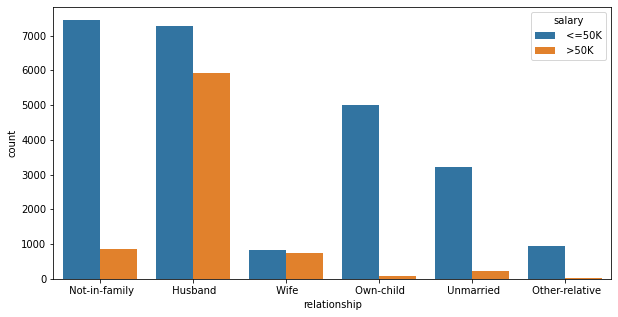

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(x= df['relationship'], hue = df['salary'])

### Workclass

In [56]:
workclass = df['workclass'].value_counts()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


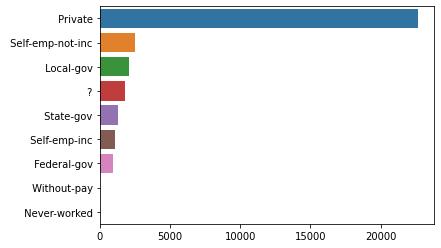

In [57]:
sns.barplot(workclass.values, workclass.index)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


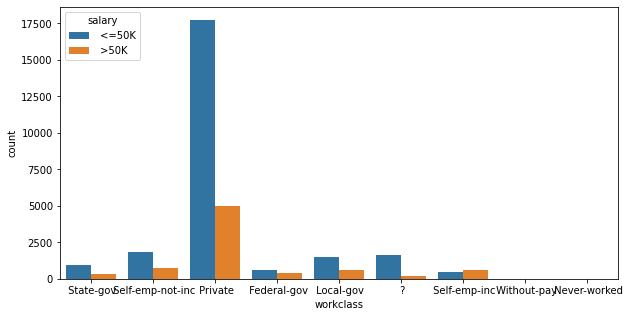

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(df['workclass'], hue = df['salary'])

## Working on incorrect data

#### Observed some values like '?' in dataset as seen in occupation,  workclass visualization

In [59]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [60]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

## Replacing '?' with null

In [61]:
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

In [62]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [63]:
df[df['workclass'] == '?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary


In [64]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [65]:
ls = []
for i in df['workclass'].value_counts().index:
    ls.append(i)

ls

[' Private',
 ' Self-emp-not-inc',
 ' Local-gov',
 ' ?',
 ' State-gov',
 ' Self-emp-inc',
 ' Federal-gov',
 ' Without-pay',
 ' Never-worked']

In [66]:
df = df.replace(' ?', np.nan)

In [67]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [75]:
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [76]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

## Working on categorical data

In [77]:
df['sex'] = df['sex'].map({' Male':1, ' Female':0})

In [78]:
df['salary'] = pd.get_dummies(df['salary'], drop_first = True)

In [79]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0


### Dropping columns with least correlation

In [80]:
df_copy = df.copy()

encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtypes == 'object':
        df_copy[col] = encoder.fit_transform(df_copy[col])

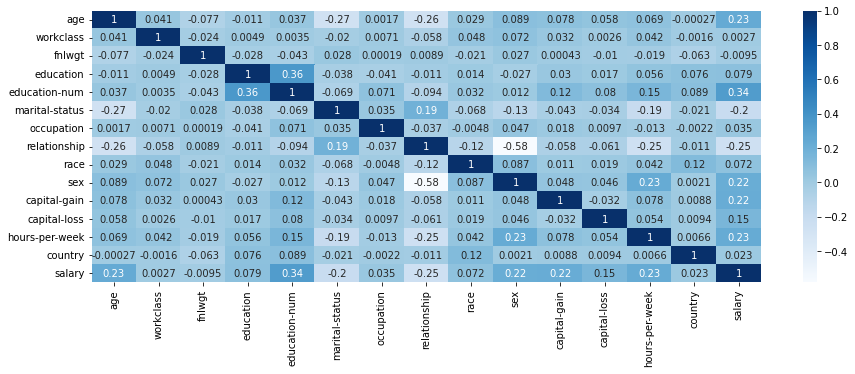

In [81]:
plt.figure(figsize = (15, 5))
corr = df_copy.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True)

#### From above heatmap we can see that columns - workclass,fnlwgt, education, occupation, country have no effect on our output hence deleting them

In [83]:
drop_columns = ['workclass','fnlwgt', 'education', 'occupation', 'country']

df = df.drop(drop_columns, axis = 1)

In [84]:
df.head(3)

,age,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,13,Never-married,Not-in-family,White,1,2174,0,40,0
1,50,13,Married-civ-spouse,Husband,White,1,0,0,13,0
2,38,9,Divorced,Not-in-family,White,1,0,0,40,0


In [85]:
categorical_columns = [col for col in df.columns if df[col].dtypes == 'object']

df = pd.get_dummies(df, categorical_columns, drop_first = True)
df.head()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,...,marital-status_ Widowed,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,13,1,2174,0,40,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,50,13,1,0,0,13,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,38,9,1,0,0,40,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,53,7,1,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0


## Handling the imbalanced data

In [86]:
X = df.drop('salary', axis = 1)
y = df['salary']

In [87]:
(y.value_counts()/len(y))*100

0    75.919044
1    24.080956
Name: salary, dtype: float64

In [89]:
sampler = RandomOverSampler(random_state = 23)

sampler.fit(X,y)

RandomOverSampler(random_state=23)

In [91]:
X_sampled, y_sampled = sampler.fit_resample(X,y)

In [97]:
y_sampled.value_counts()

0    24720
1    24720
Name: salary, dtype: int64

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, train_size = 0.75)

In [101]:
X_train.shape

(37080, 21)

In [103]:
X_test.shape

(12360, 21)

In [106]:
models = {
    'Logistric Regression' : LogisticRegression(),
    'Naive Bayes' : GaussianNB(),
    'Random Forest' : RandomForestClassifier(),
    'Decision tree' : DecisionTreeClassifier(),
    'Support Vector Classifier' : SVC(),
    'XG Boost' : XGBClassifier()
}

In [107]:
for name, model in models.items():
  model.fit(X_train, y_train)
  print(f"{name} trained!")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistric Regression trained!
Naive Bayes trained!
Random Forest trained!
Decision tree trained!
Support Vector Classifier trained!
XG Boost trained!


In [132]:
for name, model in models.items():
  y_pred = model.predict(X_test)
  score = accuracy_score(y_test, y_pred)
  print(f"{name} Accuracy score: {score * 100} %")
  print('\n')
  print(classification_report(y_test, y_pred))
  print('--------------------------------------------------------------')

Logistric Regression Accuracy score: 79.79773462783172 %


              precision    recall  f1-score   support

           0       0.87      0.71      0.78      6283
           1       0.75      0.89      0.81      6077

    accuracy                           0.80     12360
   macro avg       0.81      0.80      0.80     12360
weighted avg       0.81      0.80      0.80     12360

--------------------------------------------------------------
Naive Bayes Accuracy score: 79.67637540453075 %


              precision    recall  f1-score   support

           0       0.78      0.84      0.81      6283
           1       0.82      0.76      0.79      6077

    accuracy                           0.80     12360
   macro avg       0.80      0.80      0.80     12360
weighted avg       0.80      0.80      0.80     12360

--------------------------------------------------------------
Random Forest Accuracy score: 87.89644012944984 %


              precision    recall  f1-score   support

    

### Parameter Tuning - Random Forest and Decision tree

#### Random Forest

In [118]:
params = {
    'n_estimators' : [100, 150, 200, 250],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [2,3,4,5]
}

random_forest = RandomForestClassifier()

grid = GridSearchCV(estimator = random_forest, param_grid = params, cv = 5, scoring = 'accuracy')
grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 150, 200, 250]},
             scoring='accuracy')

In [124]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023916,0.000887,0.003849,0.000118,gini,2,best,"{'criterion': 'gini', 'max_depth': 2, 'splitte...",0.768204,0.781419,0.779126,0.786408,0.784790,0.779989,0.006418,11
1,0.020954,0.005054,0.004142,0.000673,gini,2,random,"{'criterion': 'gini', 'max_depth': 2, 'splitte...",0.750000,0.762945,0.758765,0.765237,0.764833,0.760356,0.005663,16
2,0.029448,0.001493,0.003795,0.000051,gini,3,best,"{'criterion': 'gini', 'max_depth': 3, 'splitte...",0.768204,0.781419,0.779126,0.786408,0.781553,0.779342,0.006054,12
3,0.020522,0.000289,0.003748,0.000084,gini,3,random,"{'criterion': 'gini', 'max_depth': 3, 'splitte...",0.761866,0.789239,0.790858,0.789374,0.773193,0.780906,0.011508,9
4,0.034215,0.000682,0.003841,0.000044,gini,4,best,"{'criterion': 'gini', 'max_depth': 4, 'splitte...",0.786138,0.802184,0.801106,0.808927,0.799353,0.799542,0.007446,3
5,0.027985,0.003620,0.004142,0.000519,gini,4,random,"{'criterion': 'gini', 'max_depth': 4, 'splitte...",0.761327,0.798409,0.793150,0.806634,0.788970,0.789698,0.015363,7
6,0.039450,0.001717,0.003930,0.000048,gini,5,best,"{'criterion': 'gini', 'max_depth': 5, 'splitte...",0.809331,0.824029,0.816343,0.822276,0.815129,0.817422,0.005274,1
7,0.028516,0.002916,0.004455,0.000775,gini,5,random,"{'criterion': 'gini', 'max_depth': 5, 'splitte...",0.780070,0.789644,0.781014,0.797735,0.801375,0.789968,0.008587,6
8,0.023485,0.000308,0.003718,0.000037,entropy,2,best,"{'criterion': 'entropy', 'max_depth': 2, 'spli...",0.767665,0.780879,0.777778,0.785868,0.783981,0.779234,0.006407,14
9,0.018057,0.000420,0.003761,0.000281,entropy,2,random,"{'criterion': 'entropy', 'max_depth': 2, 'spli...",0.750000,0.775081,0.773598,0.770901,0.777238,0.769364,0.009899,15


In [120]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 200}

In [121]:
params = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' :['best', 'random'],
    'max_depth' : [2,3,4,5]
}

tree = DecisionTreeClassifier()

grid = GridSearchCV(estimator = tree, param_grid = params, cv = 5, scoring = 'accuracy')
grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitFaile

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [125]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023916,0.000887,0.003849,0.000118,gini,2,best,"{'criterion': 'gini', 'max_depth': 2, 'splitte...",0.768204,0.781419,0.779126,0.786408,0.784790,0.779989,0.006418,11
1,0.020954,0.005054,0.004142,0.000673,gini,2,random,"{'criterion': 'gini', 'max_depth': 2, 'splitte...",0.750000,0.762945,0.758765,0.765237,0.764833,0.760356,0.005663,16
2,0.029448,0.001493,0.003795,0.000051,gini,3,best,"{'criterion': 'gini', 'max_depth': 3, 'splitte...",0.768204,0.781419,0.779126,0.786408,0.781553,0.779342,0.006054,12
3,0.020522,0.000289,0.003748,0.000084,gini,3,random,"{'criterion': 'gini', 'max_depth': 3, 'splitte...",0.761866,0.789239,0.790858,0.789374,0.773193,0.780906,0.011508,9
4,0.034215,0.000682,0.003841,0.000044,gini,4,best,"{'criterion': 'gini', 'max_depth': 4, 'splitte...",0.786138,0.802184,0.801106,0.808927,0.799353,0.799542,0.007446,3
5,0.027985,0.003620,0.004142,0.000519,gini,4,random,"{'criterion': 'gini', 'max_depth': 4, 'splitte...",0.761327,0.798409,0.793150,0.806634,0.788970,0.789698,0.015363,7
6,0.039450,0.001717,0.003930,0.000048,gini,5,best,"{'criterion': 'gini', 'max_depth': 5, 'splitte...",0.809331,0.824029,0.816343,0.822276,0.815129,0.817422,0.005274,1
7,0.028516,0.002916,0.004455,0.000775,gini,5,random,"{'criterion': 'gini', 'max_depth': 5, 'splitte...",0.780070,0.789644,0.781014,0.797735,0.801375,0.789968,0.008587,6
8,0.023485,0.000308,0.003718,0.000037,entropy,2,best,"{'criterion': 'entropy', 'max_depth': 2, 'spli...",0.767665,0.780879,0.777778,0.785868,0.783981,0.779234,0.006407,14
9,0.018057,0.000420,0.003761,0.000281,entropy,2,random,"{'criterion': 'entropy', 'max_depth': 2, 'spli...",0.750000,0.775081,0.773598,0.770901,0.777238,0.769364,0.009899,15


In [123]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}

In [143]:
random_forest = RandomForestClassifier(criterion= 'entropy', max_depth= 3, n_estimators = 200)

random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

acc = accuracy_score(y_pred, y_test)
print(f"Accuracy Score: {acc * 100} %")
print(classification_report(y_pred, y_test))

Accuracy Score: 78.2200647249191 %
              precision    recall  f1-score   support

           0       0.68      0.86      0.76      4933
           1       0.89      0.73      0.80      7427

    accuracy                           0.78     12360
   macro avg       0.78      0.80      0.78     12360
weighted avg       0.81      0.78      0.78     12360



In [142]:
tree = DecisionTreeClassifier(criterion= 'entropy', max_depth = 2, splitter = 'best')

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

acc = accuracy_score(y_pred, y_test)
print(f"Accuracy Score: {acc * 100} %")
print(classification_report(y_pred, y_test))

Accuracy Score: 77.26537216828478 %
              precision    recall  f1-score   support

           0       0.66      0.86      0.75      4827
           1       0.89      0.72      0.79      7533

    accuracy                           0.77     12360
   macro avg       0.77      0.79      0.77     12360
weighted avg       0.80      0.77      0.78     12360



In [145]:
#without tuning
random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

acc = accuracy_score(y_pred, y_test)
print(f"Accuracy Score: {acc * 100} %")
print(classification_report(y_pred, y_test))

Accuracy Score: 87.77508090614887 %
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      5548
           1       0.94      0.84      0.88      6812

    accuracy                           0.88     12360
   macro avg       0.88      0.88      0.88     12360
weighted avg       0.88      0.88      0.88     12360



#### Random forest without tuning is giving higer accuracy than after tuning